# Sommerfest

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import common.chat
import common.live

In [2]:
#config
reload(sys)
sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

## Live Daten
___

In [3]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')

## Auswertung 
___

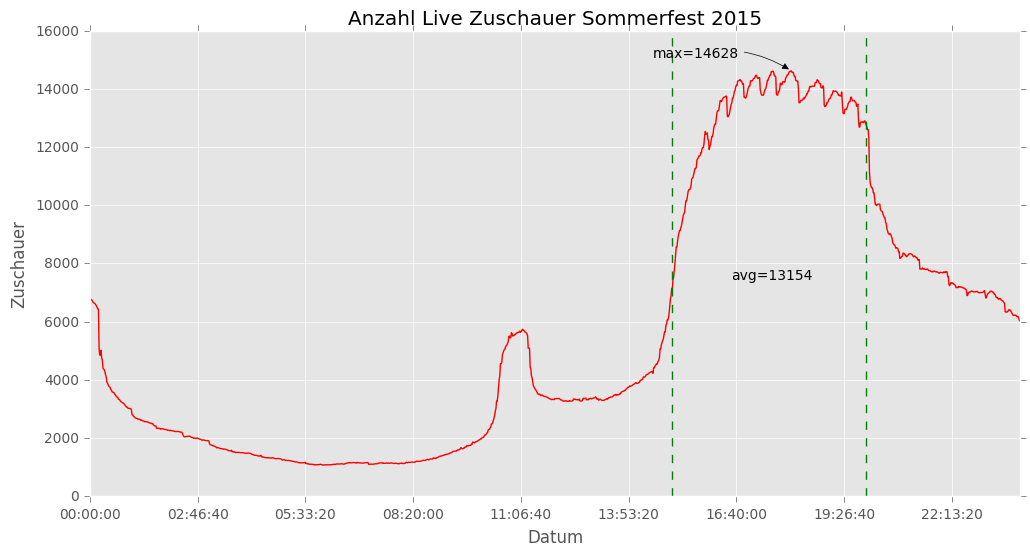

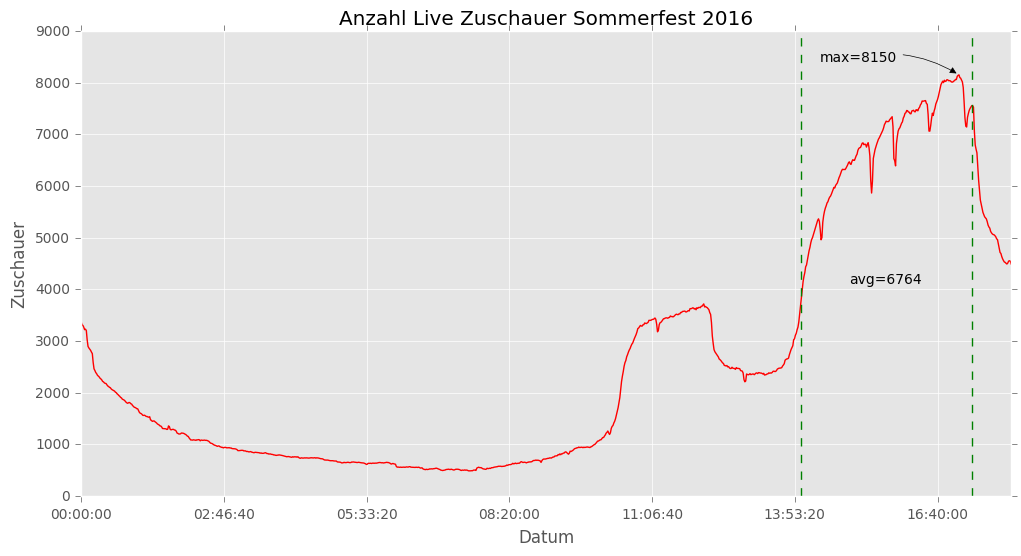

In [4]:
shows = [{
    'name': 'Sommerfest 2015',
    'date' : datetime.date(2015, 8, 28),
    'start': datetime.time(15, 0, 0),
    'end': datetime.time(20, 0, 0)
}, {
    'name': 'Sommerfest 2016',
    'date' : datetime.date(2016, 9, 30),
    'start': datetime.time(14, 0, 0),
    'end': datetime.time(17, 20, 0)
}]

for show in shows:
    #filter live data by date
    liveFiltered = live[live['day'] == str(show['date'])]

    #adjust column
    liveFiltered = liveFiltered['viewers'].to_frame('viewers')
    
    #filter live data by time
    liveFilteredTime = liveFiltered.between_time(show['start'], show['end'])

    #adjust data type
    liveFiltered = liveFiltered.set_index(liveFiltered.index.time)
    liveFilteredTime = liveFilteredTime.set_index(liveFilteredTime.index.time)

    #plot
    plot = liveFiltered.plot(figsize=(12, 6), color='r', legend=False, title='Anzahl Live Zuschauer %s' % show['name'])
    plot.set_xlabel('Datum')
    plot.set_ylabel('Zuschauer')
        
    #annotate max
    datapointMax = {
        'x': liveFilteredTime.idxmax()[0],
        'y': liveFilteredTime.max()[0]
    }
    plot.annotate('max=%d' % datapointMax['y'], 
                  xy=(datapointMax['x'], datapointMax['y']), xycoords='data', 
                  xytext=(-100, 10), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=-0.2',
                                  linewidth = 0.5,
                                  color = 'black')
                 )

    #annotate avg
    dateEnd = datetime.datetime.combine(datetime.date.today(), show['end'])
    dateStart = datetime.datetime.combine(datetime.date.today(), show['start'])
    dateMiddle = (dateStart + (dateEnd - dateStart) / 2).time()
    plot.annotate('avg=%d' % liveFilteredTime.mean(), 
                  xy=(dateMiddle, datapointMax['y']), xycoords='data', 
                  xytext=(-27, -150), textcoords='offset points')

    #start/end times
    plot.axvline(show['start'], color='g', linestyle='--')
    plot.axvline(show['end'], color='g', linestyle='--')

plot

In [5]:
data = pd.DataFrame(columns=('messages', 'participants'))

for show in shows:
    #load chat data
    chat = common.chat.load(CHAT_DATA_DIRECTORY, start=show['date'], end=show['date'])
    
    #filter chat data by time
    chat = chat.between_time(show['start'], show['end'])

    #message count
    chatMessages = len(chat)

    #count (unique) users
    chatParticipants = len(chat['username'].unique())

    data.loc[show['name']] = (chatMessages, chatParticipants)

data

,messages,participants
Sommerfest 2015,33494.0,3612.0
Sommerfest 2016,16147.0,2047.0


(0, 35000.0)

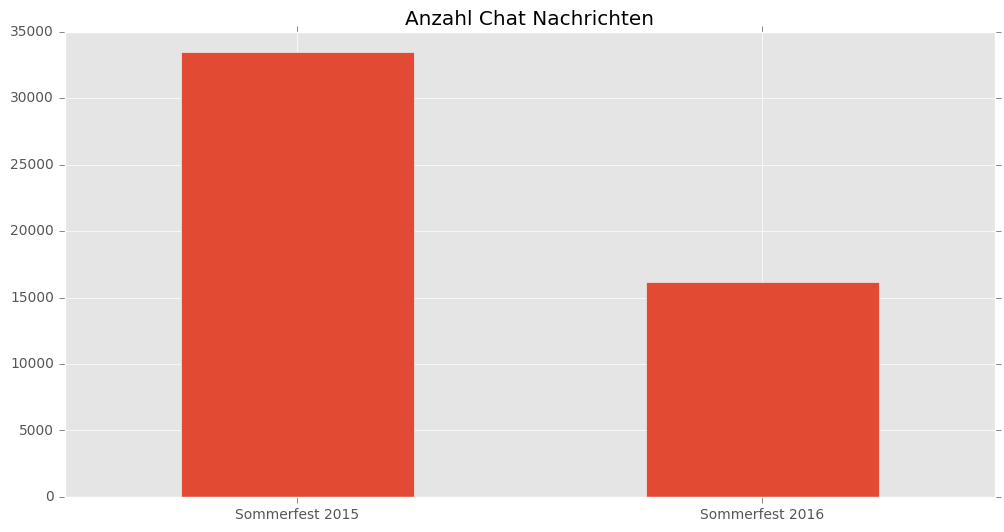

In [6]:
plot = data['messages'].plot(kind='bar', figsize=(12, 6), title='Anzahl Chat Nachrichten')

plt.xticks(rotation=0)
plt.ylim(ymin=0)

(0, 4000.0)

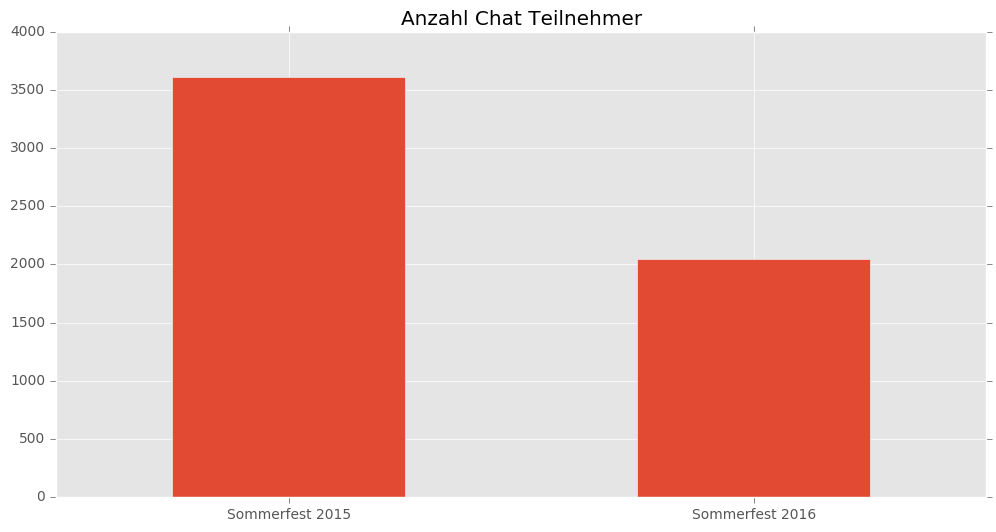

In [7]:
plot = data['participants'].plot(kind='bar', figsize=(12, 6), title='Anzahl Chat Teilnehmer')

plt.xticks(rotation=0)
plt.ylim(ymin=0)